In [11]:
# Importando as bibliotecas necessárias para esta atividade
import pandas as pd
import os


In [12]:
print(f'Esperamos trabalhar no diretório: \n{os.getcwd()}\n')

Esperamos trabalhar no diretório: 
c:\Users\Dani2\Downloads\CDADOS_PROJETO2\23-1a-cd-p2-gabriel_pedro_daniel



In [13]:
df= pd.read_csv('tic_domicilios_2021.csv', sep=';')

In [83]:
df.loc[:,['A4']].value_counts()

A4
1     17404
0      6499
97       29
98       18
dtype: int64

In [163]:


lista2=['AREA','RENDA_FAMILIAR_2','CLASSE_2015','COD_REGIAO_2','TV','DVD','TELEFONE_FIXO','VIDEOGAME','TV_ASSINATURA','ANTENA_PARABOLICA','A1_A','A1_B','A1_C','A4','A7A']
df_novo = df.loc[:,['AREA','RENDA_FAMILIAR_2','CLASSE_2015','COD_REGIAO_2','TV','DVD','TELEFONE_FIXO','VIDEOGAME','TV_ASSINATURA','ANTENA_PARABOLICA','A1_A','A1_B','A1_C','A4','A7A']]



for nomes in lista2:
    df_novo[nomes] = df_novo[nomes].astype('category') 
#df_novo['A1_A'].value_counts()
df_novo.dtypes



lista_dos_A = ['A1_A','A1_B','A1_C','A4']

for valores in lista_dos_A:
    df_novo[valores].cat.categories = ['Não', 'Sim','Não sabe','Não respondeu']
df_novo['A7A'].cat.categories = ['Não','Sim','Não sabe', 'Não respondeu','Não se aplica']
df_novo['TV_ASSINATURA'].cat.categories = ['Não tem', 'Tem']
df_novo['ANTENA_PARABOLICA'].cat.categories = ['Não tem','Tem']
df_novo['VIDEOGAME'].cat.categories = ['Não tem','Tem']
df_novo['TELEFONE_FIXO'].cat.categories = ['Não tem','Tem']
df_novo['DVD'].cat.categories = ['Não tem','1','2','3','4 ou mais']
df_novo['TV'].cat.categories = ['Não tem','1','2','3','4 ou mais']
df_novo['AREA'].cat.categories = ['Urbana','Rural']
df_novo['COD_REGIAO_2'].cat.categories = ['Sudeste','Nordeste','Sul','Norte','Centro-Oeste']
df_novo['CLASSE_2015'].cat.categories = ['A','B','C','DE']
df_novo['RENDA_FAMILIAR_2'].cat.categories = ['Até 1 SM','Mais de 1 SM até 2 SM','Mais de 2 SM até 3 SM','Mais de 3 SM até 5 SM','Mais de 5 SM até 10 SM','Mais de 10 SM','Não tem renda','Não sabe','Não respondeu']



In [164]:

df_novo['RENDA_FAMILIAR_2'].value_counts()



Até 1 SM                  9668
Mais de 1 SM até 2 SM     6136
Mais de 2 SM até 3 SM     2818
Mais de 3 SM até 5 SM     1699
Não sabe                  1002
Mais de 5 SM até 10 SM     835
Não respondeu              799
Não tem renda              715
Mais de 10 SM              278
Name: RENDA_FAMILIAR_2, dtype: int64

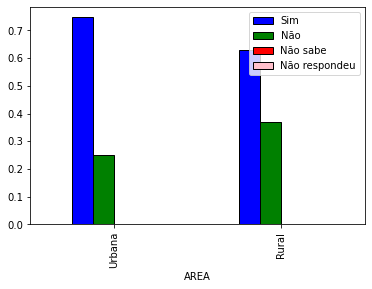

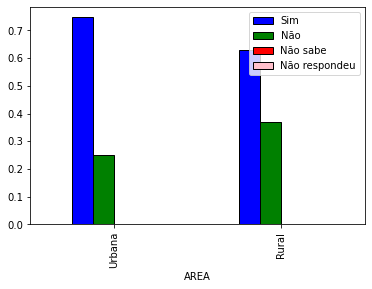

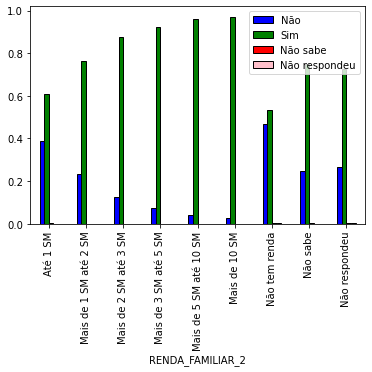

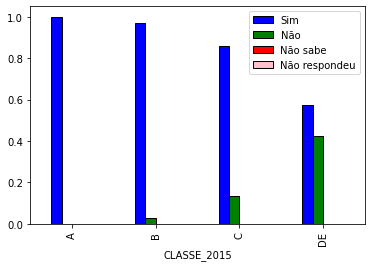

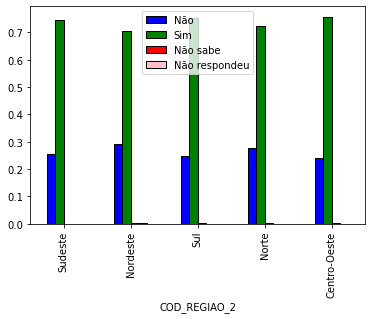

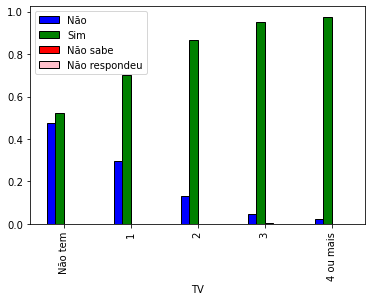

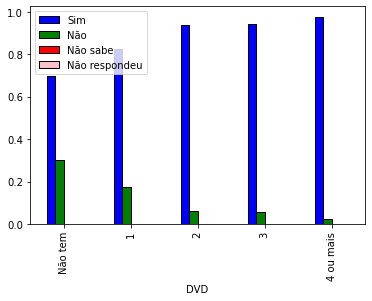

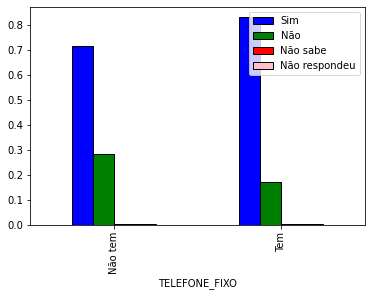

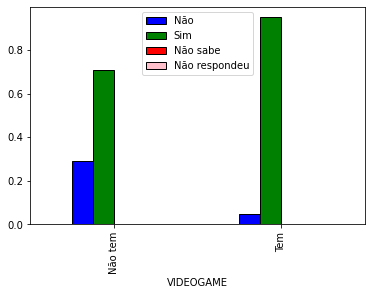

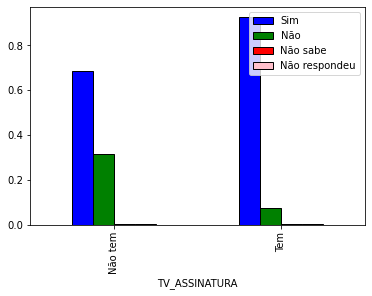

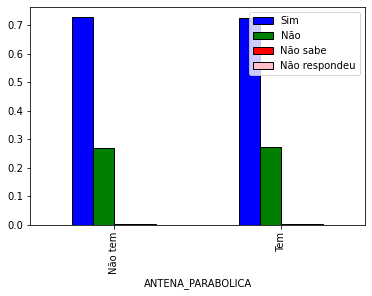

In [165]:
lista_graf = ['AREA','RENDA_FAMILIAR_2','CLASSE_2015','COD_REGIAO_2','TV','DVD','TELEFONE_FIXO','VIDEOGAME','TV_ASSINATURA','ANTENA_PARABOLICA','A1_A','A1_B','A1_C','A7A']

x = df_novo['A4'].groupby(df_novo['AREA']).value_counts(normalize = True)

x.unstack().plot.bar(color=['blue','green','red','pink'], ec = "k")

x

lista_group = []

for coluna in lista_graf:
    lista_group.append(df_novo['A4'].groupby(df_novo[coluna]).value_counts(normalize = True))

q = 0

for i in range (1,6):
    for j in range (1,3):
        lista_group[q].unstack().plot.bar(color=['blue','green','red','pink'], ec = "k")
        q = q + 1